In [1]:
# Imports
import pandas
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import ast
import datetime
import pprint

In [2]:
raw_train = pandas.read_csv('data/train.csv')
raw_train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [3]:
raw_train.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object

In [4]:
cols_to_summarize = ["genres",  "original_language", "popularity",
                     "production_companies", "production_countries",
                     "release_date", "spoken_languages", "cast", "crew"]
for col in cols_to_summarize:
    print("============{}============".format(col))
    display(raw_train[col].dropna().head())
    display(raw_train[col].dropna().describe())

============genres============


0                       [{'id': 35, 'name': 'Comedy'}]
1    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                        [{'id': 18, 'name': 'Drama'}]
3    [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4    [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
Name: genres, dtype: object

count                              2993
unique                              872
top       [{'id': 18, 'name': 'Drama'}]
freq                                266
Name: genres, dtype: object

============original_language============


0    en
1    en
2    en
3    hi
4    ko
Name: original_language, dtype: object

count     3000
unique      36
top         en
freq      2575
Name: original_language, dtype: object

============popularity============


0     6.575393
1     8.248895
2    64.299990
3     3.174936
4     1.148070
Name: popularity, dtype: float64

count    3000.000000
mean        8.463274
std        12.104000
min         0.000001
25%         4.018053
50%         7.374861
75%        10.890983
max       294.337037
Name: popularity, dtype: float64

============production_companies============


0    [{'name': 'Paramount Pictures', 'id': 4}, {'na...
1          [{'name': 'Walt Disney Pictures', 'id': 2}]
2    [{'name': 'Bold Films', 'id': 2266}, {'name': ...
6    [{'name': 'Ghost House Pictures', 'id': 768}, ...
8    [{'name': 'Walt Disney Pictures', 'id': 2}, {'...
Name: production_companies, dtype: object

count                                          2844
unique                                         2383
top       [{'name': 'Paramount Pictures', 'id': 4}]
freq                                             51
Name: production_companies, dtype: object

============production_countries============


0    [{'iso_3166_1': 'US', 'name': 'United States o...
1    [{'iso_3166_1': 'US', 'name': 'United States o...
2    [{'iso_3166_1': 'US', 'name': 'United States o...
3              [{'iso_3166_1': 'IN', 'name': 'India'}]
4        [{'iso_3166_1': 'KR', 'name': 'South Korea'}]
Name: production_countries, dtype: object

count                                                  2945
unique                                                  321
top       [{'iso_3166_1': 'US', 'name': 'United States o...
freq                                                   1752
Name: production_countries, dtype: object

============release_date============


0     2/20/15
1      8/6/04
2    10/10/14
3      3/9/12
4      2/5/09
Name: release_date, dtype: object

count        3000
unique       2398
top       9/10/10
freq            5
Name: release_date, dtype: object

============spoken_languages============


0             [{'iso_639_1': 'en', 'name': 'English'}]
1             [{'iso_639_1': 'en', 'name': 'English'}]
2             [{'iso_639_1': 'en', 'name': 'English'}]
3    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
4             [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]
Name: spoken_languages, dtype: object

count                                         2980
unique                                         401
top       [{'iso_639_1': 'en', 'name': 'English'}]
freq                                          1817
Name: spoken_languages, dtype: object

============cast============


0    [{'cast_id': 4, 'character': 'Lou', 'credit_id...
1    [{'cast_id': 1, 'character': 'Mia Thermopolis'...
2    [{'cast_id': 5, 'character': 'Andrew Neimann',...
3    [{'cast_id': 1, 'character': 'Vidya Bagchi', '...
4    [{'cast_id': 3, 'character': 'Chun-soo', 'cred...
Name: cast, dtype: object

count     2987
unique    2975
top         []
freq        13
Name: cast, dtype: object

============crew============


0    [{'credit_id': '59ac067c92514107af02c8c8', 'de...
1    [{'credit_id': '52fe43fe9251416c7502563d', 'de...
2    [{'credit_id': '54d5356ec3a3683ba0000039', 'de...
3    [{'credit_id': '52fe48779251416c9108d6eb', 'de...
4    [{'credit_id': '52fe464b9251416c75073b43', 'de...
Name: crew, dtype: object

count                                                  2984
unique                                                 2984
top       [{'credit_id': '52fe444fc3a368484e01bf9f', 'de...
freq                                                      1
Name: crew, dtype: object

In [5]:
def GetDictionary(s):
    try:
        d = ast.literal_eval(s)
    except ValueError as err:
        if not pandas.isna(s):
            print("get_dictionary error: {}".format(err))
        d = {}    
    return d

# ?/?/99 -> 1999
# ?/?/10 -> 2010
def GetReleaseYear(orig):
    if pandas.isna(orig):
        return 1900
    yr = int(orig.split('/')[2])
    if yr <= 19:
        return 2000 + yr
    else:
        return 1900 + yr
# xx/?/? -> xx
def GetReleaseMonth(orig):
    if pandas.isna(orig):
        return 0
    return int(orig.split('/')[0])

def GetCountryCodes(raw):
    return [x.get('iso_3166_1', 'NA').lower() for x in GetDictionary(raw)]

def GetGenres(raw):
    return [x.get('name', 'NA').lower() for x in GetDictionary(raw)]

def GetProductionCompanies(raw):
    return [x.get('name', 'NA').lower().replace(' ', '_')
            for x in GetDictionary(raw)]

# Holder for state needed to convert raw data to 
# sample that can be used for prediction.
class TransformerState:
    def __init__(self):
        pass
    
def TransformAndFix(train):
    t_production_countries = train['production_countries'].apply(GetCountryCodes)
    t_genres = train['genres'].apply(GetGenres)    
    t_production_companies = train['production_companies'].apply(GetProductionCompanies)
    ret = TransformerState()
    ret.genres = pandas.Series(t_genres.sum()).value_counts()
    ret.countries = pandas.Series(t_production_countries.sum()).value_counts()
    ret.production_companies = pandas.Series(t_production_companies.sum()).value_counts()
    
    ret.genres = ret.genres[ret.genres > 50]
    ret.countries = ret.countries[ret.countries > 10]
    ret.production_companies = ret.production_companies[ret.production_companies > 10]

    for data in [train,]:
        data['t_release_yr'] = data['release_date'].apply(GetReleaseYear)
        data['t_release_mo'] = data['release_date'].apply(GetReleaseMonth)
        for comp in ret.production_companies.keys():
            data['t_production_company_{}'.format(comp)] = \
                data['production_companies'].apply(lambda x: comp in GetProductionCompanies(x))

        for g in ret.genres.keys():
            data['t_genre_{}'.format(g)] = \
                data['genres'].apply(lambda x: g in GetGenres(x))
        for c in ret.countries.keys():
            data['t_production_country_{}'.format(c)] = \
                data['production_countries'].apply(lambda x: c in GetCountryCodes(x))
    return ret

In [6]:
train = raw_train.copy()
cols_to_transform = ['production_companies', 'production_countries', 'genres',
                     'spoken_languages', 'cast', 'crew']
for col in cols_to_transform:
    train['{}_dict'.format(col)] = train[col].apply(GetDictionary)


In [7]:
# Understand crew and cast
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(train['cast_dict'][0][0])
pp.pprint(train['crew_dict'][0][0])

{   'cast_id': 4,
    'character': 'Lou',
    'credit_id': '52fe4ee7c3a36847f82afae7',
    'gender': 2,
    'id': 52997,
    'name': 'Rob Corddry',
    'order': 0,
    'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}
{   'credit_id': '59ac067c92514107af02c8c8',
    'department': 'Directing',
    'gender': 0,
    'id': 1449071,
    'job': 'First Assistant Director',
    'name': 'Kelly Cantley',
    'profile_path': None}


In [8]:
transform_state = TransformAndFix(train)

In [9]:
to_remove = {'id', 'belongs_to_collection', 'genres', 'homepage',
             'imdb_id', 'original_language', 'original_title', 'overview',
             'production_companies', 'production_countries', 'release_date', 
             'runtime', 'spoken_languages', 'status', 'tagline', 'title', 
             'Keywords', 'cast', 'crew', 'poster_path', 'revenue'}
useful_columns = [c for c in train.columns if c not in to_remove and c[-5:] != '_dict']

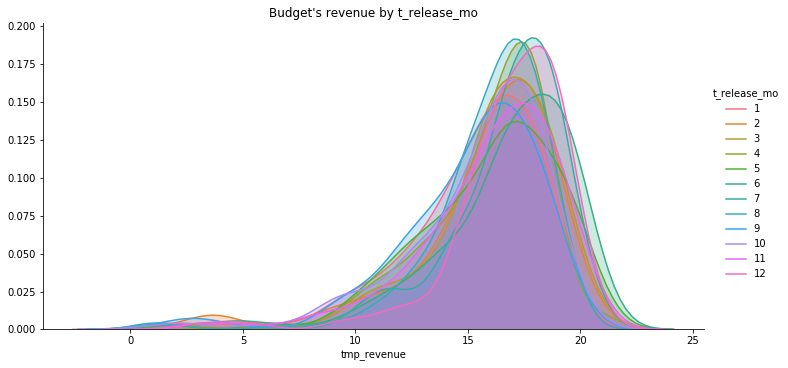

In [10]:
train["tmp_revenue"] = np.log1p(train["revenue"])
g = sns.FacetGrid(train, hue='t_release_mo', height=5, aspect=2)
g.map(sns.kdeplot, 'tmp_revenue', shade=True).add_legend()
plt.title("Budget's revenue by t_release_mo")
plt.show()

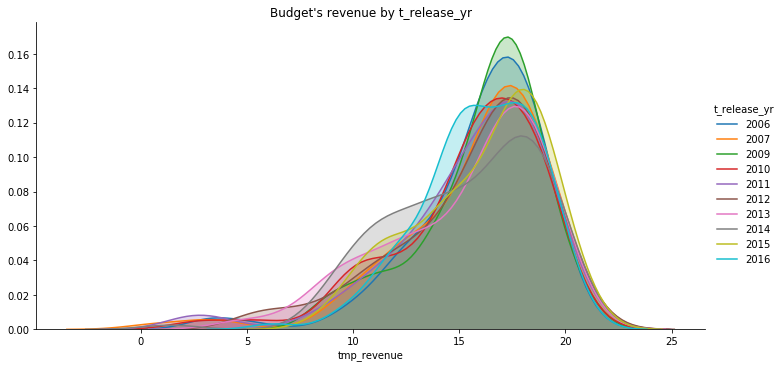

In [11]:
top_years = train['t_release_yr'].value_counts()[:10]
top_yr_filter = train['t_release_yr'].isin(top_years.index.values)
g = sns.FacetGrid(train[top_yr_filter], hue='t_release_yr', height=5, aspect=2)
g.map(sns.kdeplot, 'tmp_revenue', shade=True).add_legend()
plt.title("Budget's revenue by t_release_yr")
ax = g.ax
plt.show()

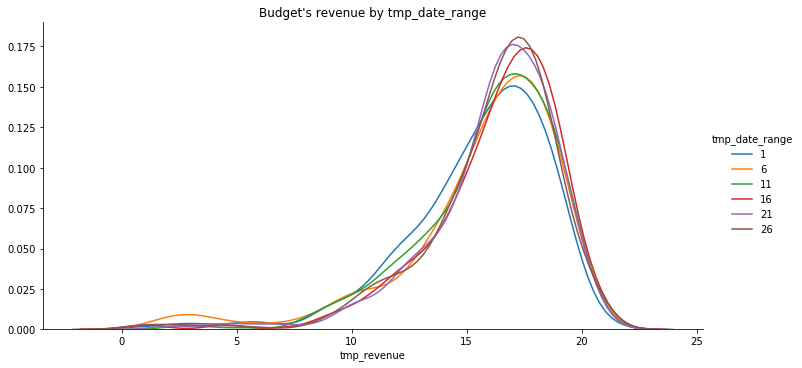

In [12]:
def GetDateRange(inp):
    if pandas.isna(inp):
        return 0
    date = int(inp.split('/')[1])
    if date < 5:
        return 1
    if date < 10:
        return 6
    if date < 15:
        return 11
    if date < 20:
        return 16
    if date < 25:
        return 21
    return 26

    
train["tmp_date_range"] = train["release_date"].apply(GetDateRange)
g = sns.FacetGrid(train, hue='tmp_date_range', height=5, aspect=2)
g.map(sns.kdeplot, 'tmp_revenue').add_legend()
plt.title("Budget's revenue by tmp_date_range")
plt.show()

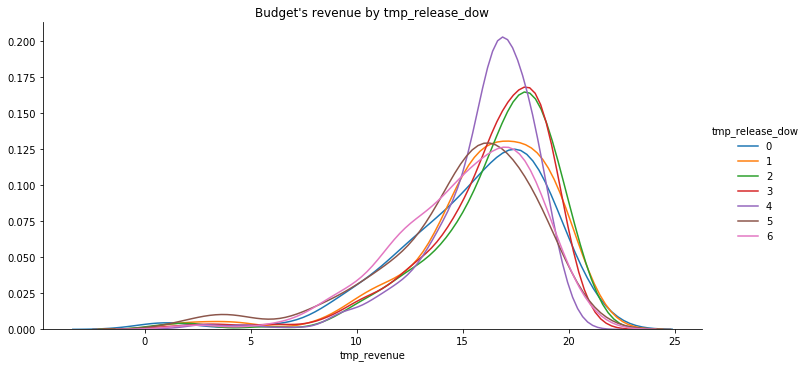

In [13]:
def GetDOW(inp):
    if pandas.isna(inp):
        return 0
    
    month, date, year = map(int, inp.split('/'))
    if year < 20:
        year = 2000 + year
    else:
        year = 1900 + year
    return datetime.datetime(year, month, date).weekday()

    
train["tmp_release_dow"] = train["release_date"].apply(GetDOW)
g = sns.FacetGrid(train, hue='tmp_release_dow', height=5, aspect=2)
g.map(sns.kdeplot, 'tmp_revenue').add_legend()
plt.title("Budget's revenue by tmp_release_dow")
plt.show()

In [14]:
for i in range(7):
    train['tmp_dow_{}'.format(i)] = \
        train['release_date'].apply(lambda x: i == GetDOW(x))
for i in [1, 6, 11, 16, 21, 26]:
    train['tmp_date_range_{}'.format(i)] = \
        train['release_date'].apply(lambda x: i == GetDateRange(x))

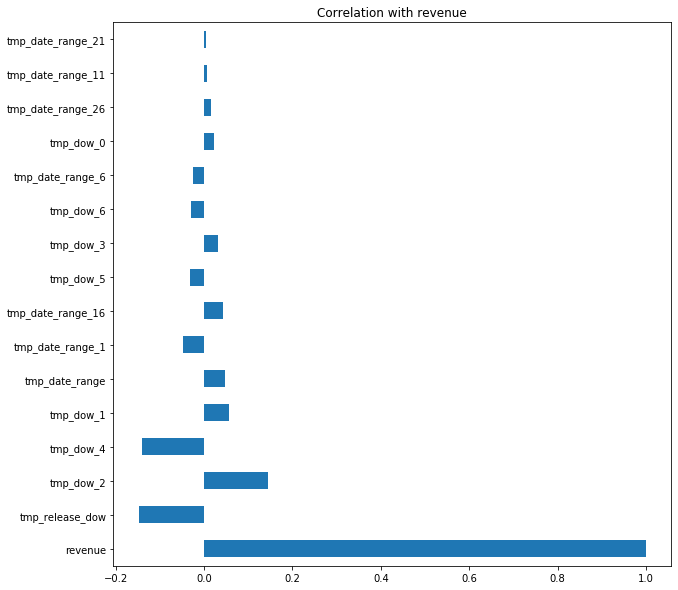

In [15]:
tmp_columns = [c for c in train.columns if c[:4] == 'tmp_' and c != 'tmp_revenue']


plt.subplots(figsize=(10, 8))
corr = train[tmp_columns + ["revenue"]].corr()
corr["order"] = -np.abs(corr["revenue"])
corr[["revenue", "order"]].dropna().sort_values(by="order").head(40)["revenue"].plot(
        kind="barh",
        title = "Correlation with revenue",
        figsize = (10,10))

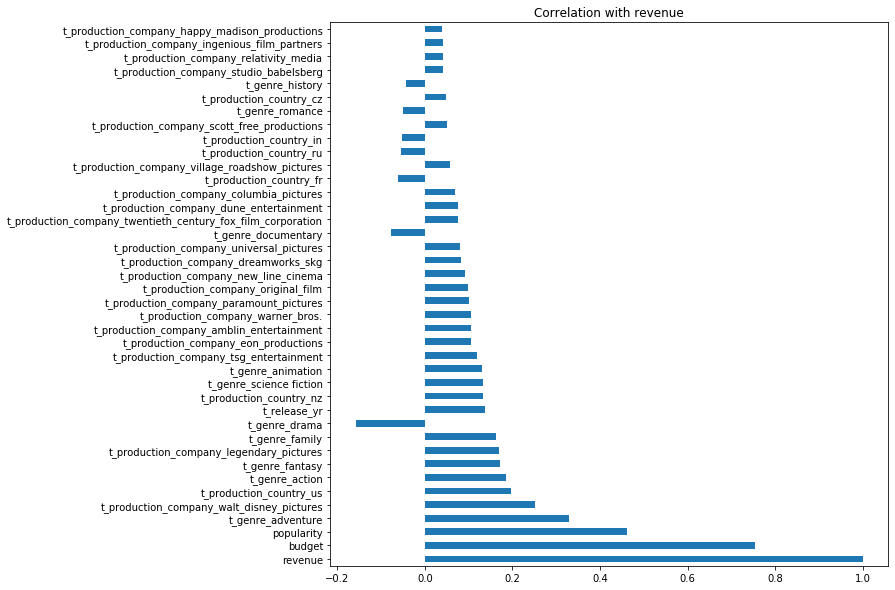

In [16]:
plt.subplots(figsize=(10, 8))
corr = train[useful_columns + ["revenue"]].corr()
corr["order"] = -np.abs(corr["revenue"])
corr[["revenue", "order"]].dropna().sort_values(by="order").head(40)["revenue"].plot(
        kind="barh",
        title = "Correlation with revenue",
        figsize = (10,10))